# Lab 7 Big data exercises



# Exercise 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

%matplotlib inline



Loading the data set into pandas

In [2]:
df = pd.read_csv("../lab7/cardata.csv")
print(df.shape)

(11914, 12)


Displays the top 5 rows in the dataset

In [3]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven Mode,Number of Doors,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,3916,34500


Check data set for types of data

In [4]:
print(df.dtypes)

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven Mode           object
Number of Doors      float64
highway MPG            int64
city mpg               int64
Popularity             int64
Price                  int64
dtype: object


Check to see if any duplicate rows exist

In [5]:
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df)

         Make     Model  Year  Engine HP  Engine Cylinders Transmission Type  \
14        BMW  1 Series  2013      230.0               6.0            MANUAL   
18       Audi       100  1992      172.0               6.0            MANUAL   
20       Audi       100  1992      172.0               6.0            MANUAL   
24       Audi       100  1993      172.0               6.0            MANUAL   
25       Audi       100  1993      172.0               6.0            MANUAL   
...       ...       ...   ...        ...               ...               ...   
11481  Suzuki      X-90  1998       95.0               4.0            MANUAL   
11603   Volvo      XC60  2017      302.0               4.0         AUTOMATIC   
11604   Volvo      XC60  2017      240.0               4.0         AUTOMATIC   
11708  Suzuki       XL7  2008      252.0               6.0         AUTOMATIC   
11717  Suzuki       XL7  2008      252.0               6.0         AUTOMATIC   

             Driven Mode  Number of Doo

Removing the duplicate rows

In [6]:
df = df.drop_duplicates()
df.count()

Make                 11028
Model                11028
Year                 11028
Engine HP            10959
Engine Cylinders     10998
Transmission Type    11028
Driven Mode          11028
Number of Doors      11022
highway MPG          11028
city mpg             11028
Popularity           11028
Price                11028
dtype: int64

Check to see if there are missing values

In [7]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven Mode           0
Number of Doors       6
highway MPG           0
city mpg              0
Popularity            0
Price                 0
dtype: int64


It is shown there are about 100 missing values existed in three columns: ‘Engine
HP’ , ‘Engine Cylinders’ and ‘Number of Doors’. The simplest strategy for handling
missing data is to remove samples that contain a missing value. In ‘cardata’, the
percentage of samples with missing values is very low (less than 1%). So it is
reasonable to use dropna() to remove all rows with missing data, as follows:

In [8]:
df = df.dropna()
print(df.count())
print(df.shape)

Make                 10929
Model                10929
Year                 10929
Engine HP            10929
Engine Cylinders     10929
Transmission Type    10929
Driven Mode          10929
Number of Doors      10929
highway MPG          10929
city mpg             10929
Popularity           10929
Price                10929
dtype: int64
(10929, 12)


Print summary and stats

In [9]:
print(df.describe())

               Year     Engine HP  Engine Cylinders  Number of Doors  \
count  10929.000000  10929.000000      10929.000000     10929.000000   
mean    2010.768780    253.367188          5.679477         3.449172   
std        7.144636    109.969181          1.765286         0.875798   
min     1990.000000     55.000000          0.000000         2.000000   
25%     2007.000000    172.000000          4.000000         2.000000   
50%     2015.000000    240.000000          6.000000         4.000000   
75%     2016.000000    303.000000          6.000000         4.000000   
max     2017.000000   1001.000000         16.000000         4.000000   

        highway MPG      city mpg    Popularity         Price  
count  10929.000000  10929.000000  10929.000000  1.092900e+04  
mean      26.336719     19.346875   1557.566932  4.213557e+04  
std        7.489187      6.625464   1448.307334  6.205717e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.0000

Plot a bar chart for the make variable

Text(0.5, 0, 'Make')

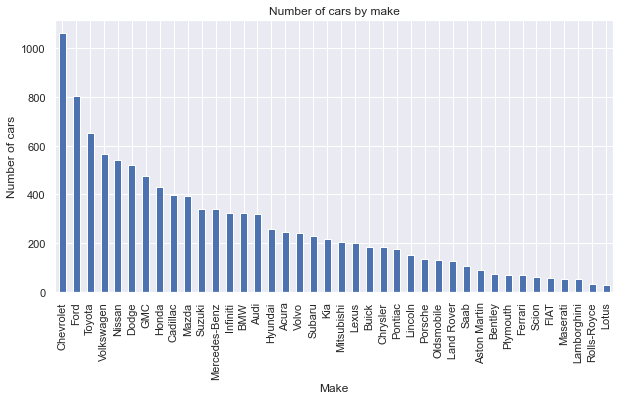

In [10]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

Plot a histogram of Engine HP

Text(0.5, 0, 'Value of Engine HP')

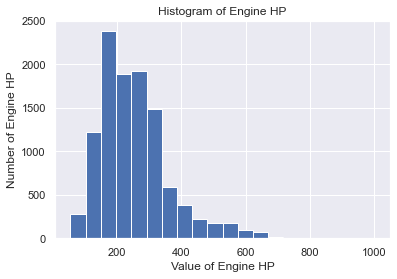

In [11]:
plt.hist(df['Engine HP'], bins = 20)
plt.title("Histogram of Engine HP")
plt.ylabel('Number of Engine HP')
plt.xlabel('Value of Engine HP')

Calculate and visualize correlations using Seaborn heat map

Heat Maps plot rectangular data as a color-encoded matrix. It is one of the best way
to find the relationship between the features. In the below heat map we know that the
price feature depends mainly on the “Engine HP” and “Engine Cylinders”, as these
two variables have highest absolute correlation coefficients (0.66 and 0.56
separately) with “Price”. Also, variables “city mpg” and “highway MPG” have the
highest correlation coefficients (0.84). 


                      Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.327957         -0.037097         0.245177   
Engine HP         0.327957   1.000000          0.788036        -0.136082   
Engine Cylinders -0.037097   0.788036          1.000000        -0.153036   
Number of Doors   0.245177  -0.136082         -0.153036         1.000000   
highway MPG       0.272054  -0.421254         -0.612161         0.120556   
city mpg          0.224110  -0.473772         -0.632701         0.140437   
Popularity        0.085127   0.040507          0.039295        -0.060403   
Price             0.203604   0.660307          0.555170        -0.148377   

                  highway MPG  city mpg  Popularity     Price  
Year                 0.272054  0.224110    0.085127  0.203604  
Engine HP           -0.421254 -0.473772    0.040507  0.660307  
Engine Cylinders    -0.612161 -0.632701    0.039295  0.555170  
Number of Doors      0.120556  0.140437   -0.060403 -0.1483

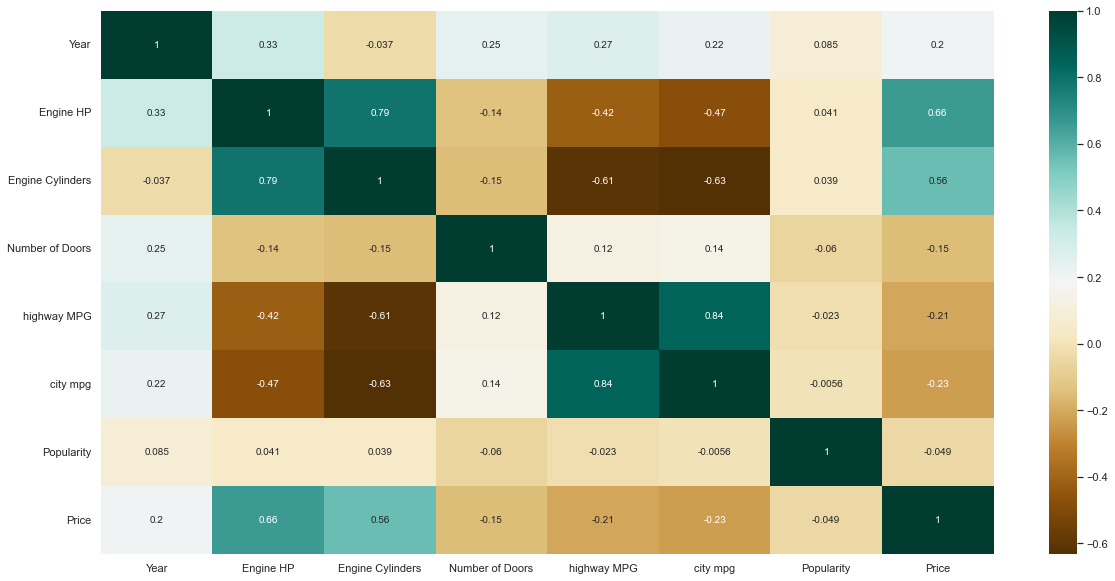

In [12]:
plt.figure(figsize = (20, 10))
corl = df.corr()
sns.heatmap(corl, cmap = "BrBG", annot = True)
print(corl)

Scatterplot is generally used to find the correlation between two variables. Here the
scatter plots are plotted between “Engine HP” (Horsepower) and “Price” and we can
see the plot below. With the plot given below, we can easily draw a trend line. These
features provide a good scattering of points.

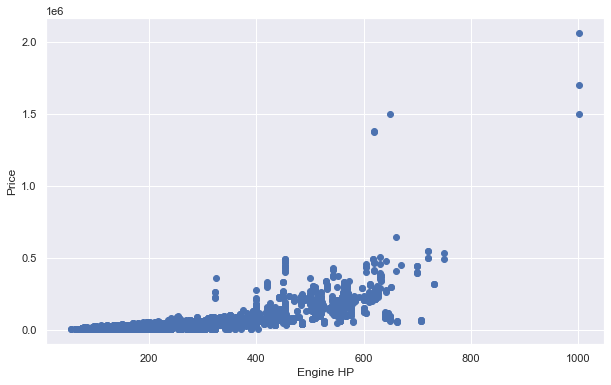

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(df['Engine HP'], df['Price'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('Price')
plt.show()

You can also using the following script to get the scatter plots between “city mpg” and
“highway MPG”:

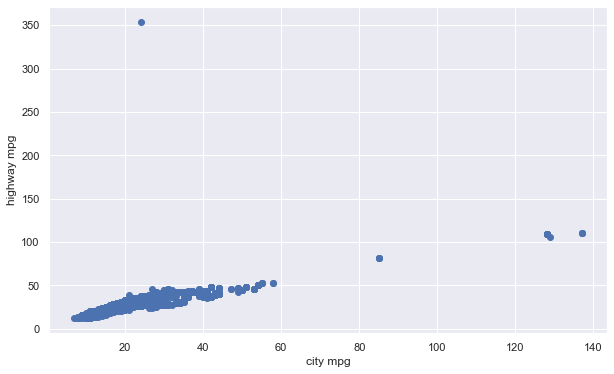

In [14]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(df['city mpg'], df['highway MPG'])
ax.set_xlabel('city mpg')
ax.set_ylabel('highway mpg')
plt.show()

# Exercise 2

Load the diabetes data set from lab7 folder


In [23]:
df2 = pd.read_csv("../lab7/diabetes.csv", header = None)
print(df2.shape)
df2.head(0)

(768, 9)


,0,1,2,3,4,5,6,7,8


Check the data types

In [24]:
print(df2.dtypes)

0      int64
1      int64
2      int64
3      int64
4      int64
5    float64
6    float64
7      int64
8      int64
dtype: object


Display the first 20 rows

In [25]:
print(df2.head(10))

    0    1   2   3    4     5      6   7  8
0   6  148  72  35    0  33.6  0.627  50  1
1   1   85  66  29    0  26.6  0.351  31  0
2   8  183  64   0    0  23.3  0.672  32  1
3   1   89  66  23   94  28.1  0.167  21  0
4   0  137  40  35  168  43.1  2.288  33  1
5   5  116  74   0    0  25.6  0.201  30  0
6   3   78  50  32   88  31.0  0.248  26  1
7  10  115   0   0    0  35.3  0.134  29  0
8   2  197  70  45  543  30.5  0.158  53  1
9   8  125  96   0    0   0.0  0.232  54  1


Check for duplicate rows

In [26]:
duplicate_rows_df2 = df2[df2.duplicated()]
print(print("number of duplicate rows: ", duplicate_rows_df2.shape))

number of duplicate rows:  (0, 9)
None


Print stats on data set

In [27]:
print(df2.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

Check for missing values

In [28]:
print(df2.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


Due to showing none we will have to check for the min value of 0 as that can be considered null for certain collumns

In [29]:
print((df2[[0,1,2,3,4,5]] == 0).sum())

0    111
1      5
2     35
3    227
4    374
5     11
dtype: int64


In [30]:
df2[[1,2,3,4,5]] = df2[[1,2,3,4,5]].replace(0, np.NaN)

In [31]:
df2.fillna(df2.mean(), inplace=True)
print(df2.isnull().sum())
print(df2.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
    0      1          2         3           4          5      6   7  8
0   6  148.0  72.000000  35.00000  155.548223  33.600000  0.627  50  1
1   1   85.0  66.000000  29.00000  155.548223  26.600000  0.351  31  0
2   8  183.0  64.000000  29.15342  155.548223  23.300000  0.672  32  1
3   1   89.0  66.000000  23.00000   94.000000  28.100000  0.167  21  0
4   0  137.0  40.000000  35.00000  168.000000  43.100000  2.288  33  1
5   5  116.0  74.000000  29.15342  155.548223  25.600000  0.201  30  0
6   3   78.0  50.000000  32.00000   88.000000  31.000000  0.248  26  1
7  10  115.0  72.405184  29.15342  155.548223  35.300000  0.134  29  0
8   2  197.0  70.000000  45.00000  543.000000  30.500000  0.158  53  1
9   8  125.0  96.000000  29.15342  155.548223  32.457464  0.232  54  1


Text(0.5, 0, 'Value of Plasma Glucose concentration')

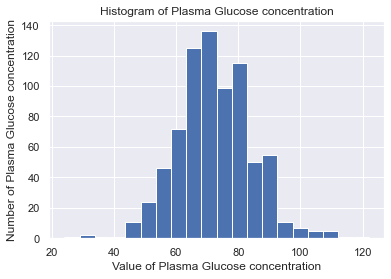

In [32]:
plt.figure(0)
plt.hist(df2[2], bins=20)
plt.title("Histogram of Plasma Glucose concentration")
plt.ylabel('Number of Plasma Glucose concentration')
plt.xlabel('Value of Plasma Glucose concentration')

Text(0.5, 0, 'Value of Body mass index')

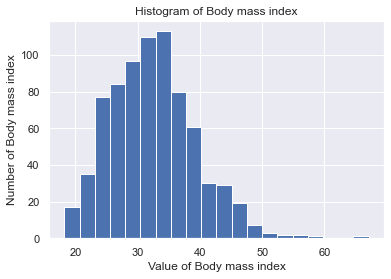

In [33]:
plt.figure(1)
plt.hist(df2[5], bins=20)
plt.title("Histogram of Body mass index")
plt.ylabel('Number of Body mass index')
plt.xlabel('Value of Body mass index')

          0         1         2         3         4         5         6  \
0  1.000000  0.127911  0.208522  0.082989  0.056027  0.021565 -0.033523   
1  0.127911  1.000000  0.218367  0.192991  0.420157  0.230941  0.137060   
2  0.208522  0.218367  1.000000  0.192816  0.072517  0.281268 -0.002763   
3  0.082989  0.192991  0.192816  1.000000  0.158139  0.542398  0.100966   
4  0.056027  0.420157  0.072517  0.158139  1.000000  0.166586  0.098634   
5  0.021565  0.230941  0.281268  0.542398  0.166586  1.000000  0.153400   
6 -0.033523  0.137060 -0.002763  0.100966  0.098634  0.153400  1.000000   
7  0.544341  0.266534  0.324595  0.127872  0.136734  0.025519  0.033561   
8  0.221898  0.492928  0.166074  0.215299  0.214411  0.311924  0.173844   

          7         8  
0  0.544341  0.221898  
1  0.266534  0.492928  
2  0.324595  0.166074  
3  0.127872  0.215299  
4  0.136734  0.214411  
5  0.025519  0.311924  
6  0.033561  0.173844  
7  1.000000  0.238356  
8  0.238356  1.000000  


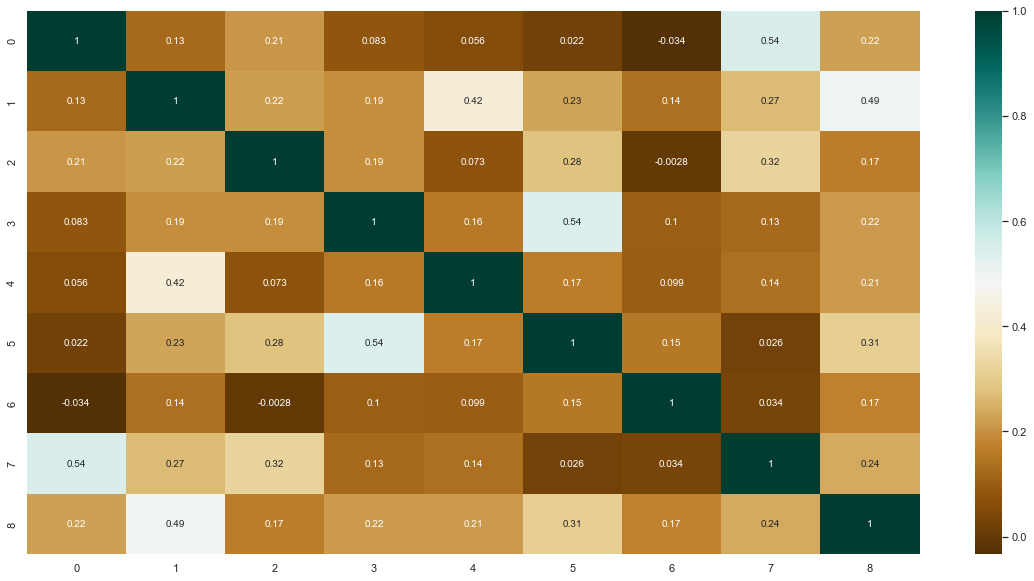

In [34]:
plt.figure(figsize=(20,10))
corl= df2.corr()
sns.heatmap(corl,cmap="BrBG",annot=True)
print(corl)

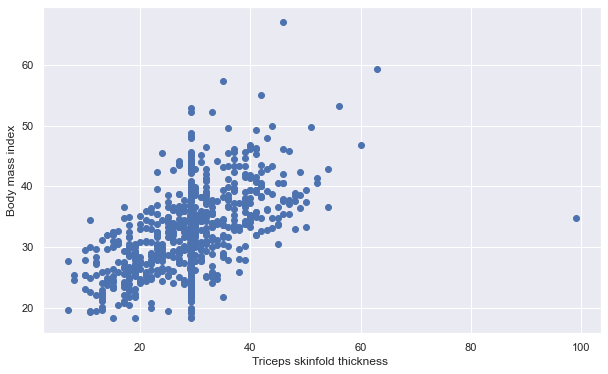

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2[3], df2[5])
ax.set_xlabel('Triceps skinfold thickness ')
ax.set_ylabel('Body mass index')
plt.show()